# Decision Tree

In [80]:
# Importing Libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("../DataSet/cleaned_Telco-Customer-Churn_data.csv")

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,-1.277445,0,1,0,0,...,0,0,0,0,0,1,2,-1.160323,-0.994242,0
1,5575-GNVDE,1,0,0,0,0.066327,1,0,0,2,...,2,0,0,0,1,0,3,-0.259629,-0.173244,0
2,3668-QPYBK,1,0,0,0,-1.236724,1,0,0,2,...,0,0,0,0,0,1,3,-0.362660,-0.959674,1
3,7795-CFOCW,1,0,0,0,0.514251,0,1,0,2,...,2,2,0,0,1,0,0,-0.746535,-0.194766,0
4,9237-HQITU,0,0,0,0,-1.236724,1,0,1,0,...,0,0,0,0,0,1,2,0.197365,-0.940470,1


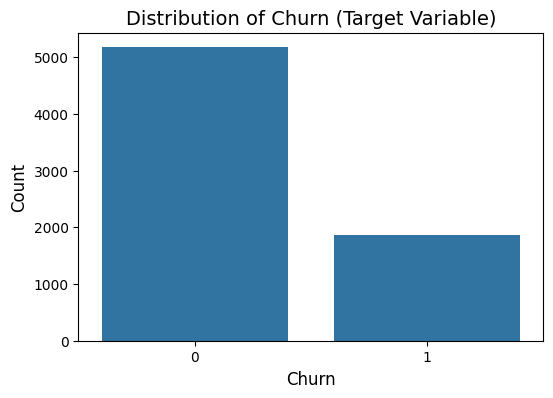

Churn Distribution (%)
 Churn
0    73.46
1    26.54
Name: proportion, dtype: float64


In [32]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn')

plt.title("Distribution of Churn (Target Variable)", fontsize=14)
plt.xlabel("Churn", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

# Percentage distribution
churn_perc = df['Churn'].value_counts(normalize=True) * 100
print("Churn Distribution (%)\n", churn_perc.round(2))

### It is evident that dataset is highly imbalanced as 'Not Churn (0)' is making aprrox. 73% of entire dataset and 'Churn (1)' just 26%. 
#### This is the problem of 'Oversampling' which can be delt with SMOTE

In [10]:
X = df.drop(columns=['customerID', 'Churn'], axis=1)
y = df['Churn']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("=======Shapes of training and testing data==========")
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("Y_train: ", y_train.shape)
print("Y_test: ", y_test.shape)

=======Shapes of training and testing data==========
X_train:  (5634, 19)
X_test:  (1409, 19)
Y_train:  (5634,)
Y_test:  (1409,)


In [113]:
smote = SMOTE(random_state=42)
# print(smote)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


      gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0          0              0        0           1 -0.463037             1   
1          0              0        0           0  0.880735             1   
2          1              0        1           0 -1.277445             0   
3          1              0        0           0 -1.155283             1   
4          1              0        0           1 -1.318165             1   
...      ...            ...      ...         ...       ...           ...   
8271       0              0        0           0 -1.038172             1   
8272       0              0        0           0  0.036382             1   
8273       1              0        0           0  0.039609             1   
8274       1              0        0           0  0.443465             1   
8275       1              1        0           0 -0.288048             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                

## Decision Tree - Crt. = Entropy

In [91]:
dtree_model = DecisionTreeClassifier(criterion="entropy", random_state=42)
dtree_model.fit(X_train_resampled, y_train_resampled)


DecisionTreeClassifier(criterion='entropy', random_state=42)

Model Accuracy: 0.69


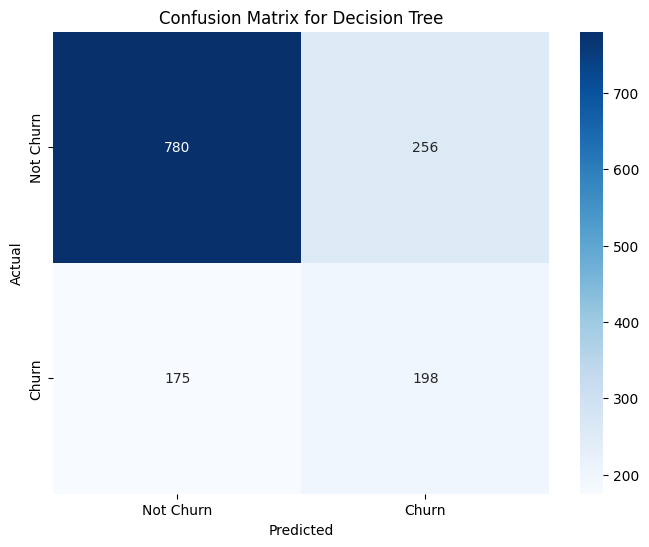


Classification Report with Entropy Criteria:
              precision    recall  f1-score   support

   Not Churn       0.82      0.75      0.78      1036
       Churn       0.44      0.53      0.48       373

    accuracy                           0.69      1409
   macro avg       0.63      0.64      0.63      1409
weighted avg       0.72      0.69      0.70      1409



In [93]:
y_pred = dtree_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


cm = confusion_matrix(y_test, y_pred)
labels = ['Not Churn', 'Churn']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("\nClassification Report with Entropy Criteria:")
print(classification_report(y_test, y_pred, target_names=labels))

## Decision Tree - Crt. = Gini

In [100]:
dtree_model_g = DecisionTreeClassifier(criterion="gini", random_state=42)
dtree_model_g.fit(X_train_resampled, y_train_resampled)


DecisionTreeClassifier(random_state=42)

Model Accuracy: 0.70


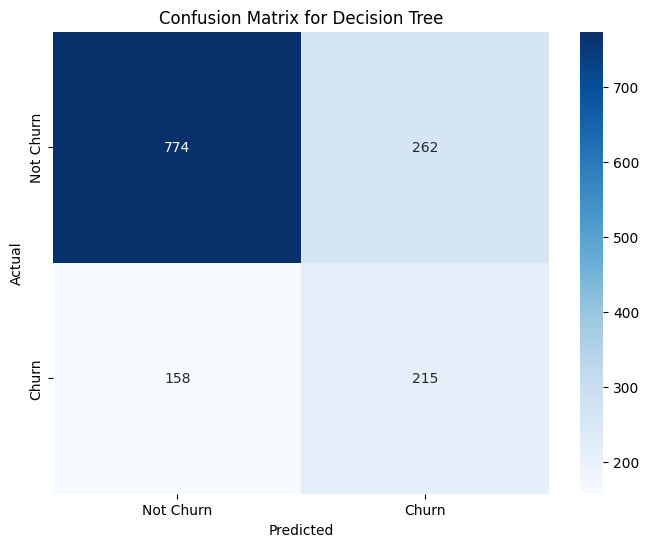


Classification Report with Gini Criteria:
              precision    recall  f1-score   support

   Not Churn       0.83      0.75      0.79      1036
       Churn       0.45      0.58      0.51       373

    accuracy                           0.70      1409
   macro avg       0.64      0.66      0.65      1409
weighted avg       0.73      0.70      0.71      1409



In [104]:
y_pred = dtree_model_g.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")



cm = confusion_matrix(y_test, y_pred)
labels = ['Not Churn', 'Churn']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("\nClassification Report with Gini Criteria:")
print(classification_report(y_test, y_pred, target_names=labels))

# ROC - Curve

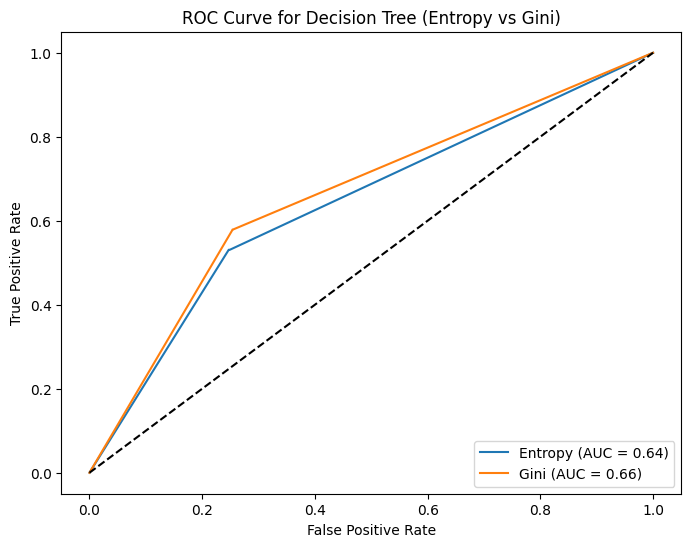

In [115]:
# For entropy model
y_pred_entropy = dtree_entropy.predict(X_test)
y_prob_entropy = dtree_entropy.predict_proba(X_test)[:, 1]  # probability of class 'Churn'

# For gini model

y_pred_gini = dtree_model_g.predict(X_test)
y_prob_gini = dtree_model_g.predict_proba(X_test)[:, 1]  # probability of class 'Churn'

# ROC curve values
fpr_entropy, tpr_entropy, _ = roc_curve(y_test, y_prob_entropy)
fpr_gini, tpr_gini, _ = roc_curve(y_test, y_prob_gini)

# AUC scores
auc_entropy = roc_auc_score(y_test, y_prob_entropy)
auc_gini = roc_auc_score(y_test, y_prob_gini)

# Plot ROC curves
plt.figure(figsize=(8,6))
plt.plot(fpr_entropy, tpr_entropy, label=f'Entropy (AUC = {auc_entropy:.2f})')
plt.plot(fpr_gini, tpr_gini, label=f'Gini (AUC = {auc_gini:.2f})')
plt.plot([0,1], [0,1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree (Entropy vs Gini)')
plt.legend(loc='lower right')
plt.show()

### Interpretation of Results

- **Decision Tree (Entropy):**
  - Accuracy: 69%
  - Good at predicting **Not Churn** customers.
  - Struggles with **Churn** customers (lower recall = 53%).

- **Decision Tree (Gini):**
  - Accuracy: 70% (slightly better).
  - Performs similar for **Not Churn**.
  - Better at catching **Churn** customers (recall = 58%).

### Why Gini is Better?
- In churn prediction, finding actual churners is more important than just accuracy.
- **Gini gives higher recall for Churn (58% vs 53%)**, meaning it identifies more customers who are likely to leave.
- Hence, **Gini is better suited here**.
